In [1]:
import pandas as pd

# Загрузка данных
file_path = 'Downloads/github_dataset.csv'
data = pd.read_csv(file_path)

# Отображение первых строк датасета для определения числовых признаков
data.head()


,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,octocat/Hello-World,0,0,612,316,2,NaN
1,EddieHubCommunity/support,271,150,536,6,71,NaN
2,ethereum/aleth,0,0,313,27,154,C++
3,localstack/localstack,0,0,290,30,434,Python
4,education/classroom,0,589,202,22,67,Ruby


In [2]:
from sklearn.preprocessing import MinMaxScaler

# 选择一个特征进行 MinMax 缩放
feature = data[['stars_count']]

# 初始化 MinMaxScaler
scaler = MinMaxScaler()

# 应用 MinMax 缩放
scaled_feature = scaler.fit_transform(feature)

# 将缩放后的数据添加回原始 DataFrame
data['stars_count_scaled'] = scaled_feature

# 显示前几行以确认缩放效果
data.head()


,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language,stars_count_scaled
0,octocat/Hello-World,0,0,612,316,2,NaN,0.000000
1,EddieHubCommunity/support,271,150,536,6,71,NaN,0.272362
2,ethereum/aleth,0,0,313,27,154,C++,0.000000
3,localstack/localstack,0,0,290,30,434,Python,0.000000
4,education/classroom,0,589,202,22,67,Ruby,0.000000


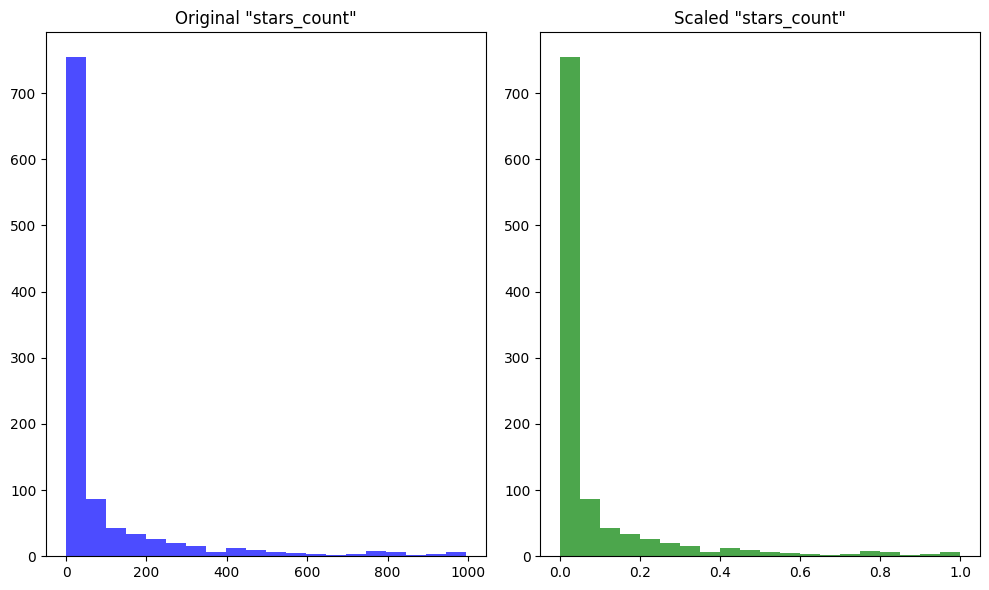

In [3]:
import matplotlib.pyplot as plt

# 绘制原始值和缩放后的值
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(data['stars_count'], bins=20, color='blue', alpha=0.7)
plt.title('Original "stars_count"')

plt.subplot(1, 2, 2)
plt.hist(data['stars_count_scaled'], bins=20, color='green', alpha=0.7)
plt.title('Scaled "stars_count"')

plt.tight_layout()
plt.show()



Набор данных содержит следующие числовые характеристики: stars_count, forks_count, Issues_count, pull_requests, участники. Мы будем масштабировать одну из функций, используя масштабирование MinMax. Если взять в качестве примера stars_count, масштабирование MinMax преобразует все значения между 0 и 1. ​

Применив масштабирование MinMax к функции stars_count, мы успешно масштабировали ее значение до значения от 0 до 1. Например, stars_count склада EddieHubCommunity/support имеет масштабированное значение 0,272, в то время как у некоторых других складов масштабированное значение равно 0, поскольку их stars_count равно 0.

График слева показывает исходное распределение значений функции stars_count, а график справа показывает распределение значений после применения масштабирования MinMax. При масштабировании MinMax значения stars_count успешно преобразуются между 0 и 1, сохраняя при этом форму исходного распределения. Такое масштабирование часто помогает повысить производительность моделей машинного обучения, особенно в алгоритмах, включающих вычисления расстояний.

In [6]:
import pandas as pd

# Загрузка данных
file_path = 'Downloads/github_dataset.csv'
data = pd.read_csv(file_path)

# Отображение первых строк датасета для определения числовых признаков
data.head()


,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,octocat/Hello-World,0,0,612,316,2,NaN
1,EddieHubCommunity/support,271,150,536,6,71,NaN
2,ethereum/aleth,0,0,313,27,154,C++
3,localstack/localstack,0,0,290,30,434,Python
4,education/classroom,0,589,202,22,67,Ruby


In [7]:
# Исключаем категориальные признаки
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Вычисляем матрицу корреляции
correlation_matrix = numeric_data.corr()

correlation_matrix


,stars_count,forks_count,issues_count,pull_requests,contributors
stars_count,1.000000,0.250037,0.060943,-0.004548,0.059866
forks_count,0.250037,1.000000,0.123204,0.048063,0.263042
issues_count,0.060943,0.123204,1.000000,0.324541,0.382578
pull_requests,-0.004548,0.048063,0.324541,1.000000,0.183981
contributors,0.059866,0.263042,0.382578,0.183981,1.000000


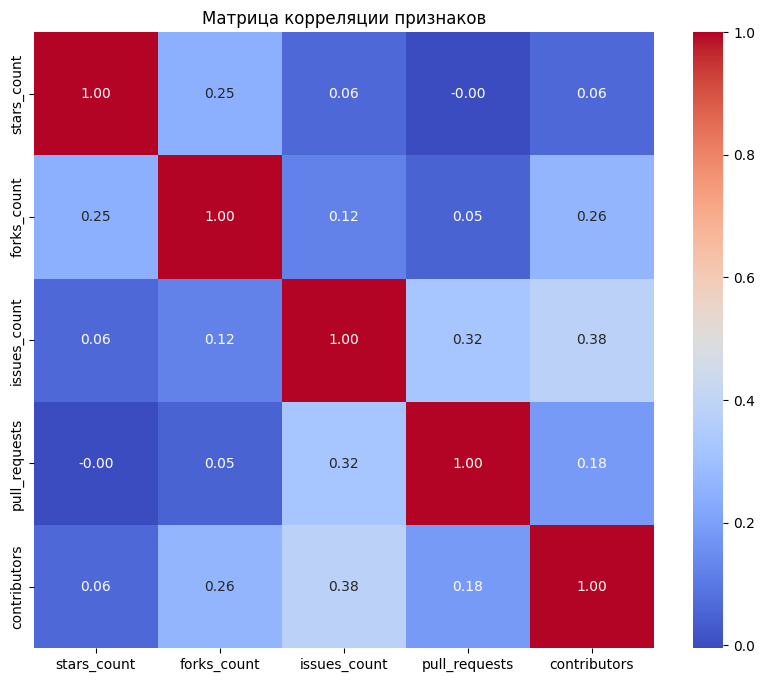

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Установим размер графика
plt.figure(figsize=(10, 8))

# Создаем тепловую карту для матрицы корреляции
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Установим заголовок
plt.title('Матрица корреляции признаков')

plt.show()


Датасет содержит следующие столбцы:

repositories: Название репозитория (категориальный признак)
stars_count: Количество звезд (числовой признак)
forks_count: Количество форков (числовой признак)
issues_count: Количество проблем (числовой признак)
pull_requests: Количество pull запросов (числовой признак)
contributors: Количество участников (числовой признак)
language: Язык программирования (категориальный признак)
В дальнейшем, для анализа корреляции, будут использоваться только числовые признаки, так как корреляция Пирсона не применима к категориальным данным. Язык программирования и название репозитория будут исключены из анализа.

Давайте вычислим матрицу корреляции для числовых признаков. ​​

Матрица корреляции показывает следующие взаимосвязи между числовыми признаками:

Количество звезд (stars_count) слабо коррелирует с количеством форков (forks_count) с коэффициентом корреляции 0.25. Это указывает на небольшую прямую связь между популярностью репозитория и количеством его форков.
Существует умеренная корреляция между количеством проблем (issues_count) и количеством pull запросов (pull_requests), коэффициент корреляции составляет 0.32. Это может указывать на то, что репозитории с большим количеством проблем чаще обновляются или модифицируются через pull запросы.
Количество участников (contributors) умеренно коррелирует с количеством проблем (issues_count) с коэффициентом 0.38 и с количеством форков (forks_count) с коэффициентом 0.26, что может указывать на активное участие сообщества в репозиториях с большим количеством форков и проблем.
В целом, данные показывают, что большая часть признаков имеет слабую или умеренную корреляцию друг с другом. Это означает, что большинство признаков могут быть полезны при моделировании, так как они не дублируют информацию друг друга. Однако выбор конкретных признаков для модели зависит от задачи и требует дополнительного анализа в контексте конкретного исследования или модели машинного обучения. ​​

На тепловой карте матрицы корреляции представлены коэффициенты корреляции между числовыми признаками датасета. Цвета указывают на силу и направление корреляции: красные цвета обозначают положительную корреляцию, синие — отрицательную, а интенсивность цвета соответствует силе корреляции. Как видно, большинство признаков имеют положительную корреляцию друг с другом, при этом наиболее заметная корреляция наблюдается между количеством проблем (issues_count) и количеством pull запросов (pull_requests), а также между количеством участников (contributors) и количеством проблем (issues_count). ​​

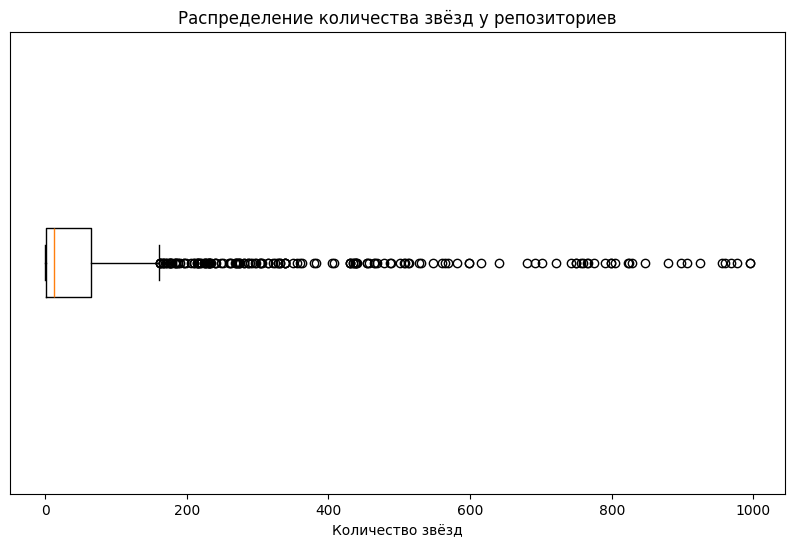

In [9]:
import matplotlib.pyplot as plt

# Построение графика "Ящик с усами (boxplot)"
plt.figure(figsize=(10, 6))
plt.boxplot(data['stars_count'], vert=False) # вертикальное отображение для лучшей визуализации
plt.title('Распределение количества звёзд у репозиториев')
plt.xlabel('Количество звёзд')
plt.yticks([])  # Убираем метки по оси Y для чистоты визуализации
plt.show()


На графике "Ящик с усами" выше показано распределение количества звёзд у репозиториев. Центральная линия внутри "ящика" обозначает медиану количества звёзд. Границы "ящика" отображают первый и третий квартили, а "усы" могут расширяться до крайних точек данных, которые не считаются выбросами. Точки за пределами "усов" указывают на потенциальные выбросы в данных. ​​